In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
train=pd.read_csv("/Users/utkarshkhanna/Downloads/Refactored_Py_DS_ML_Bootcamp-master 2/13-Logistic-Regression/titanic_train.csv")
test=pd.read_csv("/Users/utkarshkhanna/Downloads/Refactored_Py_DS_ML_Bootcamp-master 2/13-Logistic-Regression/titanic_test.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<AxesSubplot:>

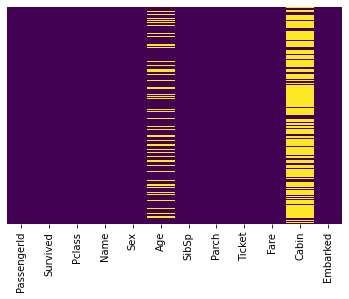

In [7]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis',cbar=False)

## Exploratory Data Analysis

In [8]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

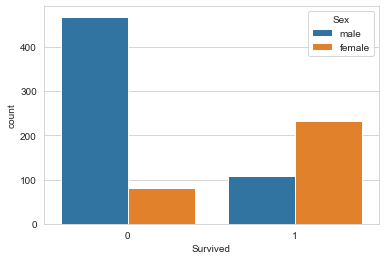

In [10]:
sns.countplot(x='Survived',hue='Sex',data=train)

#### It is seen that the people who didnt survive are more likely to be male than female. More number of females survived and lesser number of males.

<AxesSubplot:ylabel='Frequency'>

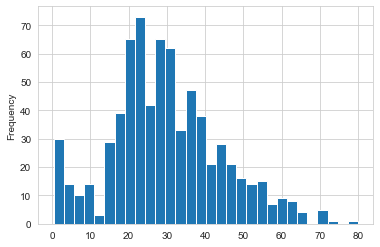

In [12]:
train['Age'].plot.hist(bins=30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

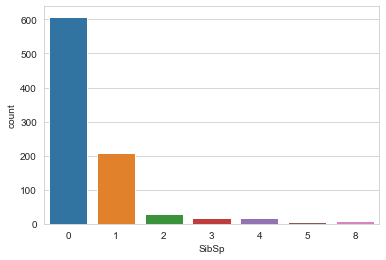

In [13]:
sns.countplot(x='SibSp',data=train)

#### Little to no people had a sibling or spouses, the second biggest number is for people with one sibling or spouse

<AxesSubplot:>

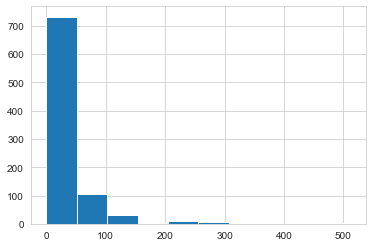

In [14]:
train['Fare'].hist()

In [16]:
!pip install cufflinks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.7/81.7 kB 1.2 MB/s eta 0:00:00ta 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.8/137.8 kB 261.5 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.3/384.3 kB 755.5 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 364.8 kB/s eta 0:00:0000:0100:01
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=67917 sha256=06c0edd1fa68952e45403e38cb5e298b277305124558819b092affb557bfd67c
  Stored in directory: /Users/utkarshkhanna/Library/Caches/pip/wheels/09/8a/6b/cbe3e87b2e59bb5f90b49b034ce36b80b46a4d6e38444c34de
Successfully built cufflinks

[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [21]:
import cufflinks as cf

In [22]:
cf.go_offline()

In [25]:
train['Fare'].iplot(kind='hist',bins=50)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

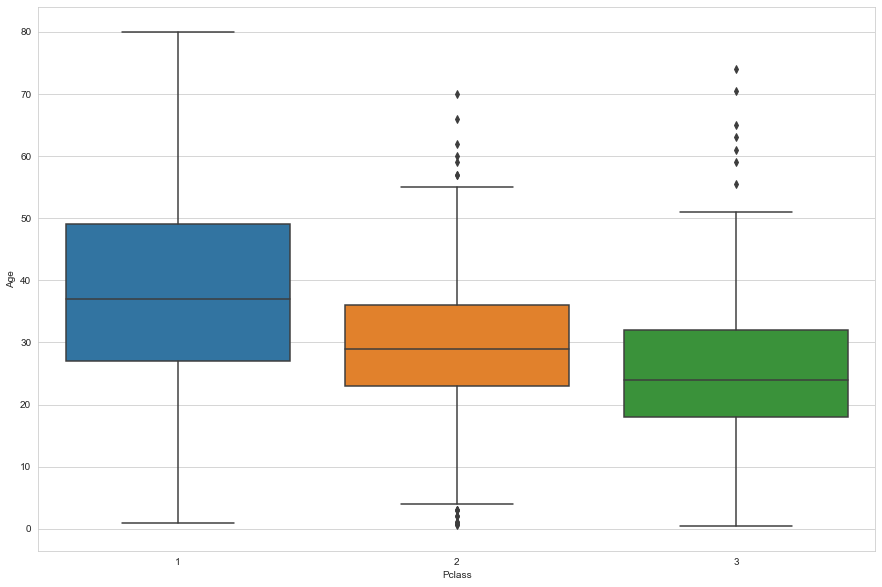

In [29]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Pclass',y='Age',data=train)

In [31]:
# a function to impute age in the null/ missing values in the dataset
def imputer(cols):
    Age=cols[0]
    Pclass=cols[1]

    if(pd.isnull(Age)):
        if(Pclass==1): return 37 
        elif(Pclass==2): return 29
        else : return 24
    else:
        return Age

In [33]:
# Applying the imputer function
train['Age']=train[['Age','Pclass']].apply(imputer, axis=1)

<AxesSubplot:>

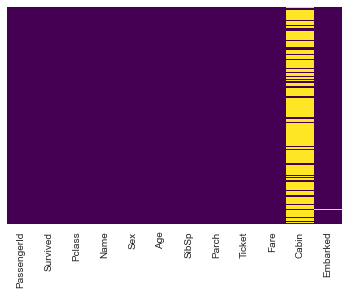

In [34]:
# checking for the null points
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis',cbar=False)

In [35]:
# the cabin column has a lot of null values, hence we decide to drop the column
train.drop('Cabin', axis=1, inplace=True)

In [38]:
train.dropna(inplace=True)

#### We need to now convert the categorical values into dummy numericals

In [40]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
embarked=pd.get_dummies(train['Embarked'],drop_first=True)

In [41]:
train=pd.concat([train,sex,embarked],axis=1)

In [42]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,24,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37,1,0,PC 17599,71.2833,C,0,0,0


In [44]:
train.drop(['Name','Sex','Embarked','Ticket'],axis=1, inplace=True)

In [46]:
train.drop('PassengerId', axis=1,inplace=True)

In [47]:
X=train.drop('Survived',axis=1)
y=train['Survived']

In [51]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=101)

In [54]:
from sklearn.linear_model import LogisticRegression

In [86]:
logisticModel=LogisticRegression(solver='liblinear', max_iter=100)

In [87]:
logisticModel.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [84]:
predict=logisticModel.predict(X_test)

In [75]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [85]:
print(classification_report(y_test,predict))
print('CONFUSION MATRIX')
print(confusion_matrix(y_test,predict))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       163
           1       0.84      0.65      0.74       104

    accuracy                           0.82       267
   macro avg       0.82      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267

CONFUSION MATRIX
[[150  13]
 [ 36  68]]


#### As we can see the accuracy of the model is pretty good, given we used smaller set of data, by splitting our data